<div>
    <font size = "6" color = "black">
        <p style = "text-align:center;">
            <b> Basalt Tectonic Setting Estimation</b> 
        </p>
    </font>
</div>

<p style = text-align:center>    
    <a href = "http://georoc.mpch-mainz.gwdg.de/georoc/">Georoc Dara Resource Link</a>
</p>

<h1>Table of Contents</h1>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a href="#1">1. Foreword</a>    
        </li>
        <br>
        <li>
            <a href="#2">2. Meet with Data</a>    
        </li>
        <br>
        <li>
            <a href="#3">3. Data Cleaning</a>    
        </li>
        <br>
        <li>
            <a href="#4">4. Column Data Filling</a>
            <ul>
                <li><a href="#41">4.1. Age Column Filling</a></li>
                <li><a href="#42">4.2. Geol. Column Filling</a></li>
                <li><a href="#43">4.3. Rock Texture Column Filling</a></li>
                <li><a href="#44">4.4. Alteration Column Filling</a></li>
            </ul>
        </li>
        <br>
        <li>
            <a href="#5">5. Principal Component Analysis (PCA)</a> 
            <ul>
                <li><a href="#51">5.1. Label Encoder Application </a></li>
                <li><a href="#52">5.2. Standard Scaler Application</a></li>
                <li><a href="#53">5.3. PCA Application </a></li>
            </ul>
        </li>
        <br>
        <li>
            <a href="#6">6. M.L. Model Developing</a> 
             <ul>
                <li><a href="#61">6.1. Model Competition</a></li>
                <li><a href="#62">6.2. Best KFold Selection</a></li>
                 <li><a href="#63">6.3. Hyper Parameter Selection</a></li>
                 <li><a href="#64">6.4. Estimator Model Applying</a></li>  
            </ul>
        </li>
        <br>
        <li>
            <a href="#7">7. Try Other 7 Data with Model</a>
            <ul>
                <li><a href="#71">7.1. Clean All Basalt Data</a></li>
                <li><a href="#72">7.2. Apply PCA Concat Data</a></li>
                <li><a href="#73">7.3. Prepare Target Column</a></li>
            </ul>
        </li>
        <br>
        <li>
            <a href="#8">8. Conclusion</a>   
        </li>
    </ul>
</div>

<hr style="border: none; border-bottom: 2px solid lightblue;">

<h1><a id="1">1. FOREWORD</a></h1>

<div>
    <font size = "4", color = "#1e5492">
        I am a Mineral Processing engineer and I am training myself about Data Science. 
        Unfortunately, there is not much data about mineral processing, so I turned my face into Geology data.
        Geologist are much closer to new world from mineral processing engineers. :(
        Thanks to Jack Maughan, he has nice writing in 
        <a href = "https://medium.com/@jackmaughan_50251/machine-learning-with-orange-vol-2-a5a90f9f3461">here</a>,
        I met <a href = "http://georoc.mpch-mainz.gwdg.de/georoc/"> GEOROC </a> data sets. These data are real
        challenges. Hard projects mean good experience. Let's start.
    </font> 
</div>

<hr style="border: none; border-bottom: 2px solid lightblue;">

<h1><a id = "2">2. MEET WITH DATA</a></h1>

In [1]:
#data import 
import pandas as pd 

basalt1 = pd.read_csv('C:/Users/aktar/Desktop/GEOROC verileri/BASALT_part1.csv', engine = 'python',
                      sep=',', quotechar='"', error_bad_lines=False)
basalt2 = pd.read_csv('C:/Users/aktar/Desktop/GEOROC verileri/BASALT_part2.csv', engine = 'python',
                      sep=',', quotechar='"', error_bad_lines=False)
basalt3 = pd.read_csv('C:/Users/aktar/Desktop/GEOROC verileri/BASALT_part3.csv', engine = 'python',
                      sep=',', quotechar='"', error_bad_lines=False)
basalt4 = pd.read_csv("C:/Users/aktar/Desktop/GEOROC verileri/BASALT_part4.csv", engine = 'python',
                      sep=',', quotechar='"', error_bad_lines=False)
basalt5 = pd.read_csv('C:/Users/aktar/Desktop/GEOROC verileri/BASALT_part5.csv', engine = 'python',
                      sep=',', quotechar='"', error_bad_lines=False)
basalt6 = pd.read_csv('C:/Users/aktar/Desktop/GEOROC verileri/BASALT_part6.csv', engine = 'python',
                      sep=',', quotechar='"', error_bad_lines=False)
basalt7 = pd.read_csv('C:/Users/aktar/Desktop/GEOROC verileri/BASALT_part7.csv', engine = 'python',
                      sep=',', quotechar='"', error_bad_lines=False)
basalt8 = pd.read_csv('C:/Users/aktar/Desktop/GEOROC verileri/BASALT_part8.csv', engine = 'python',
                      sep=',', quotechar='"', error_bad_lines=False)

Skipping line 1607: ',' expected after '"'
Skipping line 1608: ',' expected after '"'
Skipping line 14433: ',' expected after '"'
Skipping line 11915: ',' expected after '"'
Skipping line 11963: ',' expected after '"'


In [2]:
print("Basalt1 rows = %1.0f and Basat1 columns = %1.0f" %(basalt1.shape[0], basalt1.shape[1]))
print("Basalt2 rows = %1.0f and Basat1 columns = %1.0f" %(basalt2.shape[0], basalt1.shape[1]))
print("Basalt3 rows = %1.0f and Basat1 columns = %1.0f" %(basalt3.shape[0], basalt1.shape[1]))
print("Basalt4 rows = %1.0f and Basat1 columns = %1.0f" %(basalt4.shape[0], basalt1.shape[1]))
print("Basalt5 rows = %1.0f and Basat1 columns = %1.0f" %(basalt5.shape[0], basalt1.shape[1]))
print("Basalt6 rows = %1.0f and Basat1 columns = %1.0f" %(basalt6.shape[0], basalt1.shape[1]))
print("Basalt7 rows = %1.0f and Basat1 columns = %1.0f" %(basalt7.shape[0], basalt1.shape[1]))
print("Basalt8 rows = %1.0f and Basat1 columns = %1.0f" %(basalt8.shape[0], basalt1.shape[1]))

Basalt1 rows = 11739 and Basat1 columns = 172
Basalt2 rows = 9769 and Basat1 columns = 172
Basalt3 rows = 8457 and Basat1 columns = 172
Basalt4 rows = 17336 and Basat1 columns = 172
Basalt5 rows = 14556 and Basat1 columns = 172
Basalt6 rows = 14628 and Basat1 columns = 172
Basalt7 rows = 12767 and Basat1 columns = 172
Basalt8 rows = 12044 and Basat1 columns = 172


<font size = 5, color = #1e5492>
    There are 8 data in here. They all have 172 columns. I will try to identfy columns 
</font>  

<p style = text-align:left>
    <font size = 5 color = #1e5492>
        <b>
            Columns Names:
        </b>
    </font>
</p> 
<br>
    <ul>
        <li><font color = #1e5492><b>0 - CITATIONS: </b></font>I guess we do not need this column</li>
        <li><font color = #1e5492><b>1 - TECTONIC SETTING :</b></font> This the target column. We will try to identfy Rock Tectonic Tectonic
            type (I don't want to push you to the wall with Geology terms)
        </li>
        <li><font color = #1e5492><b>2 - LOCATION, 3 - LOCATION COMMENT:</b></font> Detailed location values
        </li>
        <li>
            <font color = #1e5492>
                <b>4 - LATITUDE MIN, 5 - LATITUDE MAX ,6 -LONGITUDE MIN, 7 - LONGITUDE MAX:</b>
            </font> Location of samples values
        </li>
        <li><font color = #1e5492><b>8 - LAND OR SEA: </b></font> Sample from Land or Sea
        </li>
        <li><font color = #1e5492><b>9 - ELEVATION MIN, 10 - ELEVATION MAX:</b></font>
        </li>
        <li><font color = #1e5492><b>11 - SAMPLE NAME, 12 - ROCK NAME:</b></font> Definition about samples
        </li>
        <li><font color = #1e5492><b>13 - MIN. AGE (YRS.), 14 - MAX. AGE (YRS.):</b></font> Sample Age
        </li>
        <li><font color = #1e5492><b>15 - GEOL., 16 - AGE:</b></font> Geological category about Age
        </li>
        <li><font color = #1e5492><b>17 - ERUPTION DAY, 18 - ERUPTION MONTH, 19 - ERUPTION YEAR:</b></font>
        </li>
        <li><font color = #1e5492><b>20 - ROCK TEXTURE,21 - ROCK TYPE:</b></font>
        </li>
        <li><font color = #1e5492><b>22 - DRILL DEPTH MIN , 23 - DRILL DEPTH MAX:</b></font></li>
        <li><font color = #1e5492><b>24 - ALTERATION:</b></font></li>
        <li><font color = #1e5492><b>25 - MINERAL:</b></font></li>
        <li><font color = #1e5492><b>26 - MATERIAL:</b></font></li>
        <li><font color = #1e5492><b>27 to 60:</b></font>Sample content by weight values</li>
        <li><font color = #1e5492><b>61 to 69:</b></font>I do not know the means of (CCM/G), (CCMSTP/G),
        (AT/G), (MOLE/G), (NCC/G) values. 
        </li>
        <li><font color = #1e5492><b>71 to 145</b></font> Sample grades by ppm unit
        </li>
        <li><font color = #1e5492><b>146 to 169</b></font> Some values about sample. I don't know
        </li>
        <li><font color = #1e5492><b>170 - UNIQUE_ID</b></font>
        </li>
        <li><font color = #1e5492><b>171 - Unnamed: 171</b></font>
        </li>

<font size = 5, color = #1e5492>
    Look closer to data  
</font>  

In [3]:
#is there nan values 
basalt1.isna().sum().values

array([    0,  1103,  1116,  4075,  1104,  1104,  1104,  1104,  1103,
       10467, 10437,  1069,  1069, 11279, 11193, 10625,  6233, 11702,
       11699, 11545, 10984,  1069, 11508, 11508, 10871, 11682,  1069,
        2269,  2372, 11739,  2380, 11527,  9450,  9906,  4418,  2378,
        2334,  2492, 11679,  2245,  2391,  2678, 11247, 10956, 10996,
       11739, 11188, 11739, 11552, 11541, 11739, 11739, 11739, 11739,
       11695, 11739, 11548,  6993, 11739, 11739, 11739, 11739, 11708,
       11739, 11739, 11739, 11739, 11739, 11739, 11739, 11739, 10733,
       11001, 11604, 11739, 11693, 11696, 11738, 11726, 11726, 11667,
       11647, 11602, 11563, 11712,  6000, 11109,  5034,  4550, 11359,
       11714,  7380,  4145,  6688,  6461,  7016, 11420, 11302, 11677,
       11674,  3555,  3375,  3937,  3757,  4180, 10939, 11482, 11511,
       11470, 11589, 11366, 11571, 11201, 11254, 11731, 11718,  8225,
        3693,  5180,  5180,  7398,  6093,  6085,  6312,  7067,  6752,
        7032,  7414,

In [4]:
#there are lots of nan values in basalt1. Look at other data: 

print("Basalt 2 nan value counts")
print(basalt1.isna().sum().values)
print()
print("Basalt 3 nan value counts")
print(basalt3.isna().sum().values)
print()
print("Basalt 4 nan value counts")
print(basalt4.isna().sum().values)
print()
print("Basalt 5 nan value counts")
print(basalt5.isna().sum().values)
print()
print("Basalt 6 nan value counts")
print(basalt6.isna().sum().values)
print()
print("Basalt 7 nan value counts")
print(basalt7.isna().sum().values)
print()
print("Basalt 8 nan value counts")
print(basalt8.isna().sum().values)

Basalt 2 nan value counts
[    0  1103  1116  4075  1104  1104  1104  1104  1103 10467 10437  1069
  1069 11279 11193 10625  6233 11702 11699 11545 10984  1069 11508 11508
 10871 11682  1069  2269  2372 11739  2380 11527  9450  9906  4418  2378
  2334  2492 11679  2245  2391  2678 11247 10956 10996 11739 11188 11739
 11552 11541 11739 11739 11739 11739 11695 11739 11548  6993 11739 11739
 11739 11739 11708 11739 11739 11739 11739 11739 11739 11739 11739 10733
 11001 11604 11739 11693 11696 11738 11726 11726 11667 11647 11602 11563
 11712  6000 11109  5034  4550 11359 11714  7380  4145  6688  6461  7016
 11420 11302 11677 11674  3555  3375  3937  3757  4180 10939 11482 11511
 11470 11589 11366 11571 11201 11254 11731 11718  8225  3693  5180  5180
  7398  6093  6085  6312  7067  6752  7032  7414  7063  7822  6241  6492
  6795  7180 11335 11600 11490 11465 11470 11559 11686 11371  6682 11550
  5392  6706  9169 11695 11734  9050 11675 10190 11737 10189 11737 10202
 11737 11738 11738 11722 

<font size = 5, color = #1e5492>
    The nan value situations are same for all basalt data. So I want to work with shortest data, in the name
    "basalt 3"
</font> 

In [5]:
#train data 
train = basalt3.copy()

<hr style="border: none; border-bottom: 2px solid lightblue;">

<h1><a id = "3">3. DATA CLEANING</a></h1>


In [6]:
train.isna().sum().values

array([   0,  810,  820, 3660,  810,  810,  810,  810,  810, 7788, 7745,
        794,  794, 8055, 8014, 7929, 4916, 8432, 8426, 8311, 7844,  794,
       7365, 7365, 7969, 8340,  794, 1942, 1986, 8457, 2019, 8167, 7115,
       7317, 3251, 2017, 1940, 2535, 8352, 1933, 2004, 2095, 8098, 7876,
       8124, 8457, 8192, 8457, 8326, 8329, 8457, 8457, 8457, 8457, 8352,
       8457, 7856, 4906, 8457, 8457, 8457, 8457, 8414, 8457, 8457, 8457,
       8457, 8457, 8457, 8457, 8457, 7493, 7802, 8328, 8457, 8364, 8417,
       8457, 8451, 8451, 8158, 8252, 8353, 8161, 8427, 4627, 7887, 3977,
       3773, 8223, 8451, 5026, 3479, 5214, 4977, 5906, 8104, 8178, 8386,
       8431, 3336, 3081, 3186, 3101, 3561, 7824, 8395, 8421, 8373, 8281,
       8281, 8321, 7816, 8021, 8420, 8444, 5943, 3547, 3954, 3877, 5012,
       3975, 4104, 4405, 4765, 4681, 4752, 4980, 4774, 5209, 4387, 4602,
       4803, 5019, 7930, 8313, 8320, 8376, 8366, 8385, 8429, 7850, 5016,
       8241, 4100, 4685, 6627, 8455, 8443, 6643, 84

In [7]:
#define a function for drop data according to nan values 
def drop_nan_columns(df, number):
    #create a columns list 
    columns = df.columns
    #define a list wtih the name of columns that should be dropped 
    will_drop = list()
    #loop in columns
    for i in range(len(columns)):
        # is nan values equal to number?
        if (df.iloc[:,i].isnull().sum() == number):
            #add the name 
            will_drop.append(columns[i])
    #drop columns
    df = df.drop(columns = will_drop, axis = 1)
    #print the dropped columns number
    print("%1.0f columns dropped" %(len(will_drop)))
    #record new df 
    return df 

<font size = 5, color = #1e5492>
    The length of the data is 8457. Some columns seems like empty. I want to drop them first
</font> 

In [10]:
train = drop_nan_columns(train, 8457)
train.isna().sum()

0 columns dropped


CITATIONS              0
TECTONIC SETTING       0
LOCATION              10
LOCATION COMMENT    2850
LATITUDE MIN           0
                    ... 
HE3_HE4             7608
HE3_HE4(R/R(A))     7476
HE4_HE3             7645
HE4_HE3(R/R(A))     7646
UNIQUE_ID              0
Length: 145, dtype: int64

<font size = 5, color = #1e5492>
    TECTONIC SETTING columns is target column. NaN values as unacceptable. 
</font> 

In [9]:
train = train[train['TECTONIC SETTING'].notna()]
train.isna().sum().values

array([   0,    0,   10, 2850,    0,    0,    0,    0,    0, 6978, 6935,
          0,    0, 7245, 7204, 7119, 4106, 7622, 7616, 7501, 7034,    0,
       6555, 6555, 7159, 7530,    0, 1142, 1186, 1219, 7357, 6306, 6508,
       2450, 1217, 1140, 1735, 7542, 1133, 1204, 1295, 7288, 7067, 7315,
       7382, 7516, 7519, 7542, 7046, 4096, 7604, 6683, 6992, 7518, 7554,
       7607, 7641, 7641, 7348, 7442, 7543, 7351, 7617, 3827, 7077, 3176,
       2973, 7413, 7641, 4217, 2679, 4413, 4177, 5105, 7294, 7368, 7576,
       7621, 2535, 2283, 2386, 2301, 2752, 7014, 7585, 7611, 7563, 7471,
       7471, 7511, 7006, 7211, 7610, 7634, 5134, 2744, 3152, 3074, 4202,
       3169, 3305, 3604, 3955, 3876, 3942, 4170, 3964, 4399, 3586, 3792,
       3993, 4209, 7120, 7503, 7510, 7566, 7556, 7575, 7619, 7040, 4208,
       7431, 3292, 3877, 5819, 7645, 7633, 5835, 7634, 6367, 7634, 6372,
       7634, 6372, 7634, 7625, 7521, 7629, 7590, 7211, 7608, 7476, 7645,
       7646,    0], dtype=int64)

<font size = 5, color = #1e5492>
    I want to look closer to columns 
</font> 

In [11]:
#print all columns name
train.columns.values

array(['CITATIONS', 'TECTONIC SETTING', 'LOCATION', 'LOCATION COMMENT',
       'LATITUDE MIN', 'LATITUDE MAX', 'LONGITUDE MIN', 'LONGITUDE MAX',
       'LAND OR SEA', 'ELEVATION MIN', 'ELEVATION MAX', 'SAMPLE NAME',
       'ROCK NAME', 'MIN. AGE (YRS.)', 'MAX. AGE (YRS.)', 'GEOL.', 'AGE',
       'ERUPTION DAY', 'ERUPTION MONTH', 'ERUPTION YEAR', 'ROCK TEXTURE',
       'ROCK TYPE', 'DRILL DEPTH MIN', 'DRILL DEPTHAX', 'ALTERATION',
       'MINERAL', 'MATERIAL', 'SIO2(WT%)', 'TIO2(WT%)', 'AL2O3(WT%)',
       'CR2O3(WT%)', 'FE2O3(WT%)', 'FEO(WT%)', 'FEOT(WT%)', 'CAO(WT%)',
       'MGO(WT%)', 'MNO(WT%)', 'NIO(WT%)', 'K2O(WT%)', 'NA2O(WT%)',
       'P2O5(WT%)', 'H2O(WT%)', 'H2OP(WT%)', 'H2OM(WT%)', 'CO2(WT%)',
       'F(WT%)', 'CL(WT%)', 'SO3(WT%)', 'S(WT%)', 'LOI(WT%)',
       'HE(CCMSTP/G)', 'LI(PPM)', 'BE(PPM)', 'B(PPM)', 'CO2(PPM)',
       'F(PPM)', 'MG(PPM)', 'AL(PPM)', 'P(PPM)', 'S(PPM)', 'CL(PPM)',
       'K(PPM)', 'CA(PPM)', 'SC(PPM)', 'TI(PPM)', 'V(PPM)', 'CR(PPM)',
       'MN(PPM)'

In [12]:
#what is the data types of columns
train.dtypes.values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('O'), dtype('O'),
       dtype('O'), dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float

<font size = 5 color = 1e5492>
    I want to focus on 'OBJECT' data types columns.
</font>


In [13]:
#create a function for objecty dtypes columns seperation
def define_objects(df):
    #columns list 
    columns = df.columns
    #define the list with name of columns that data types is object 
    objects_list = list()
    #loop in columns list 
    for i in range(len(columns)):
        #if column data types is object 
        if df.iloc[:,i].dtypes == 'object':
            #add columns name into the list 
            objects_list.append(columns[i])
    #print number of object columns 
    print('%1.0f columns dtypes are object' % (len(objects_list)))
    #define new data
    object_data = df[objects_list]
    return object_data


In [14]:
#new data with the object data 
object_data = define_objects(train)
object_data.dtypes

17 columns dtypes are object


CITATIONS           object
TECTONIC SETTING    object
LOCATION            object
LOCATION COMMENT    object
LAND OR SEA         object
SAMPLE NAME         object
ROCK NAME           object
MIN. AGE (YRS.)     object
MAX. AGE (YRS.)     object
GEOL.               object
AGE                 object
ROCK TEXTURE        object
ROCK TYPE           object
ALTERATION          object
MINERAL             object
MATERIAL            object
UNIQUE_ID           object
dtype: object

In [15]:
#look the data 
object_data.head(20)

,CITATIONS,TECTONIC SETTING,LOCATION,LOCATION COMMENT,LAND OR SEA,SAMPLE NAME,ROCK NAME,MIN. AGE (YRS.),MAX. AGE (YRS.),GEOL.,AGE,ROCK TEXTURE,ROCK TYPE,ALTERATION,MINERAL,MATERIAL,UNIQUE_ID
0,[191],OCEAN ISLAND,HAWAIIAN ISLANDS / HAWAII / HUALALAI,"HUALALAI QUADRANGLE, NORTHWEST OF HAINOA CRATER",SAE,s_KS87-46 [191],BASALT [191],NaN,NaN,NaN,NaN,NaN,VOL,F,HE3_HE4(R/R(A)) from OLIVINE [191],MIN [191],1496
1,[1977],CONTINENTAL FLOOD BASALT,DECCAN / NORTHERN DECCAN,"KUTCH BAY AREA, NORTH OF BHUJ HILL",SAE,s_1 [1977],"BASALT, ALKALINE, OLIVINE [1977]",NaN,NaN,NaN,NaN,NaN,VOL,NaN,NaN,WR [1977],149604
2,[1977],CONTINENTAL FLOOD BASALT,DECCAN / NORTHERN DECCAN,"NIWAS AREA, MANDLA DISTRICT",SAE,s_9/2 [1977],BASALT [1977],NaN,NaN,NaN,NaN,NaN,VOL,NaN,NaN,WR [1977],149606
3,[1977],CONTINENTAL FLOOD BASALT,DECCAN / NORTHERN DECCAN,"NIWAS AREA, MANDLA DISTRICT",SAE,s_14/2 [1977],BASALT [1977],NaN,NaN,NaN,NaN,NaN,VOL,NaN,NaN,WR [1977],149607
4,[1977],CONTINENTAL FLOOD BASALT,DECCAN / NORTHERN DECCAN,"NIWAS AREA, MANDLA DISTRICT",SAE,s_15/2 [1977],BASALT [1977],NaN,NaN,NaN,NaN,NaN,VOL,NaN,NaN,WR [1977],149608
5,[1977],CONTINENTAL FLOOD BASALT,DECCAN / NORTHERN DECCAN,"NIWAS AREA, MANDLA DISTRICT",SAE,s_12/2 [1977],BASALT [1977],NaN,NaN,NaN,NaN,NaN,VOL,NaN,NaN,WR [1977],149609
6,[1977],CONTINENTAL FLOOD BASALT,DECCAN / NORTHERN DECCAN,SOUTH-CENTRAL KUTCH,SAE,s_9/13 [1977],BASALT [1977],NaN,NaN,NaN,NaN,NaN,VOL,NaN,NaN,WR [1977],149610
7,[1977],CONTINENTAL FLOOD BASALT,DECCAN / NORTHERN DECCAN,SOUTH-CENTRAL KUTCH,SAE,s_3/14 [1977],BASALT [1977],NaN,NaN,NaN,NaN,NaN,VOL,NaN,NaN,WR [1977],149611
8,[22774],RIFT VOLCANICS,ANTARCTICA / WEST ANTARCTIC RIFT SYSTEM / ROSS...,NaN,SAE,s_K16012408-1 [22774],"BASALT, ALKALINE [22774]",NaN,NaN,NaN,QUATERNARY [22774],NaN,VOL,NaN,NaN,WR [22774],1496116
9,[1977],CONTINENTAL FLOOD BASALT,DECCAN / NORTHERN DECCAN,SOUTH-CENTRAL KUTCH,SAE,s_13/14 [1977],BASALT [1977],NaN,NaN,NaN,NaN,NaN,VOL,NaN,NaN,WR [1977],149612


<font size = 4 color = #1e5492>
    Columns Examination 
</font>
<hr>
<div>
    <ul>
        <li><b><font color = #1e5492>CITATIONS:</font></b> This columns tell nothing to me. DROP</li>
        <li><b><font color = #1e5492>TECTONIC SETTING:</font></b> Target column. Looks like categorical</li>
        <li><b><font color = #1e5492>LOCATION:</font></b>Long string. I can not use it Drop!!!</li>
        <li><b><font color = #1e5492>LOCATION COMMENT:</font></b>Long string. I can not use it Drop!!!</li>
        <li><b><font color = #1e5492>LAND OR SEA:</font></b>Categorical. Love it!</li>
        <li><b><font color = #1e5492>SAMPLE NAME:</font></b>Special codes. Can't use it. Drop!!!</li>
        <li><b><font color = #1e5492>ROCK NAME:</font></b>Categorical. Love it!></li>
        <li><b><font color = #1e5492>MIN. AGE (YRS.):</font></b>Ages good but lots of data is nan. Drop!!!</li>
        <li><b><font color = #1e5492>MAX. AGE (YRS.):</font></b>Ages good but lots of data is nan. Drop!!!</li>
        <li><b><font color = #1e5492>GEOL.:</font></b>Categorical. Love it!</li>
        <li><b><font color = #1e5492>AGE:</font></b>Categorical. Love it!</li>
        <li><b><font color = #1e5492>ROCK TEXTURE:</font></b>Categorical. Love it!</li>
        <li><b><font color = #1e5492>ROCK TYPE:</font></b>Categorical. Love it!</li>
        <li><b><font color = #1e5492>ALTERATION:</font></b>Categorical. Love it!</li>
        <li><b><font color = #1e5492>MINERAL:</font></b>Long string. I can not use it Drop!!!</li>
        <li><b><font color = #1e5492>MATERIAL:</font></b>Categorical. Love it!</li>
        <li><b><font color = #1e5492>UNIQUE_ID:</font></b>Nothing to tell me. Drop!!!</li>
    </ul>
</div>

In [16]:
#drop examination results 
dropped_columns_from_object = ["CITATIONS", 
                              "LOCATION",
                             "LOCATION COMMENT",
                             "SAMPLE NAME",
                             "MIN. AGE (YRS.)",
                             "MAX. AGE (YRS.)",
                             "MINERAL",
                             "UNIQUE_ID"]
object_data = object_data.drop(columns = dropped_columns_from_object, axis = 1)

In [17]:
#change the other columns to categorical 
columns = object_data.columns 
object_data[columns] = object_data[columns].astype('category')
print(object_data.dtypes)

TECTONIC SETTING    category
LAND OR SEA         category
ROCK NAME           category
GEOL.               category
AGE                 category
ROCK TEXTURE        category
ROCK TYPE           category
ALTERATION          category
MATERIAL            category
dtype: object


In [18]:
object_data.head(10)

,TECTONIC SETTING,LAND OR SEA,ROCK NAME,GEOL.,AGE,ROCK TEXTURE,ROCK TYPE,ALTERATION,MATERIAL
0,OCEAN ISLAND,SAE,BASALT [191],NaN,NaN,NaN,VOL,F,MIN [191]
1,CONTINENTAL FLOOD BASALT,SAE,"BASALT, ALKALINE, OLIVINE [1977]",NaN,NaN,NaN,VOL,NaN,WR [1977]
2,CONTINENTAL FLOOD BASALT,SAE,BASALT [1977],NaN,NaN,NaN,VOL,NaN,WR [1977]
3,CONTINENTAL FLOOD BASALT,SAE,BASALT [1977],NaN,NaN,NaN,VOL,NaN,WR [1977]
4,CONTINENTAL FLOOD BASALT,SAE,BASALT [1977],NaN,NaN,NaN,VOL,NaN,WR [1977]
5,CONTINENTAL FLOOD BASALT,SAE,BASALT [1977],NaN,NaN,NaN,VOL,NaN,WR [1977]
6,CONTINENTAL FLOOD BASALT,SAE,BASALT [1977],NaN,NaN,NaN,VOL,NaN,WR [1977]
7,CONTINENTAL FLOOD BASALT,SAE,BASALT [1977],NaN,NaN,NaN,VOL,NaN,WR [1977]
8,RIFT VOLCANICS,SAE,"BASALT, ALKALINE [22774]",NaN,QUATERNARY [22774],NaN,VOL,NaN,WR [22774]
9,CONTINENTAL FLOOD BASALT,SAE,BASALT [1977],NaN,NaN,NaN,VOL,NaN,WR [1977]


<font size = 5 color = #1e5492>
    There are unwanted numbers inside rows. I want to clean them
</font>

In [19]:
#remove values inside square brackets

object_data['ROCK NAME'] = object_data['ROCK NAME'].str.replace(r"(\s*\[.*?\]\s*)", "")
object_data['AGE'] = object_data['AGE'].str.replace(r"(\s*\[.*?\]\s*)", "")
object_data['MATERIAL'] = object_data['MATERIAL'].str.replace(r"(\s*\[.*?\]\s*)", "")
object_data['GEOL.'] = object_data['GEOL.'].str.replace(r"(\s*\[.*?\]\s*)", "")
object_data['ROCK TEXTURE'] = object_data['ROCK TEXTURE'].str.replace(r"(\s*\[.*?\]\s*)", "")

object_data.head(20)

,TECTONIC SETTING,LAND OR SEA,ROCK NAME,GEOL.,AGE,ROCK TEXTURE,ROCK TYPE,ALTERATION,MATERIAL
0,OCEAN ISLAND,SAE,BASALT,NaN,NaN,NaN,VOL,F,MIN
1,CONTINENTAL FLOOD BASALT,SAE,"BASALT, ALKALINE, OLIVINE",NaN,NaN,NaN,VOL,NaN,WR
2,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR
3,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR
4,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR
5,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR
6,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR
7,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR
8,RIFT VOLCANICS,SAE,"BASALT, ALKALINE",NaN,QUATERNARY,NaN,VOL,NaN,WR
9,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR


In [20]:
#discahrge train data. I need to space for work 
#first drop object_data columns 
train = train.drop(columns = object_data.columns.values, axis = 1)

#after drop already dropped columns 
train = train.drop(columns = dropped_columns_from_object, axis = 1)

train.columns

Index(['LATITUDE MIN', 'LATITUDE MAX', 'LONGITUDE MIN', 'LONGITUDE MAX',
       'ELEVATION MIN', 'ELEVATION MAX', 'ERUPTION DAY', 'ERUPTION MONTH',
       'ERUPTION YEAR', 'DRILL DEPTH MIN',
       ...
       'PB208_PB204_INI', 'OS187_OS186', 'OS187_OS188', 'RE187_OS186',
       'RE187_OS188', 'HF176_HF177', 'HE3_HE4', 'HE3_HE4(R/R(A))', 'HE4_HE3',
       'HE4_HE3(R/R(A))'],
      dtype='object', length=128)

<font size = 5 color = #1e5492>
    Go back to the "train" data."ppm" values and "wt" values are laboratory mesurement results. I will seperate
    them from main data and fill the NaN values with 0. 
</font>

In [21]:
#function for find specific columns 
def find_column_names(df,name):
    #list for specific name
    specific_name = list()
    # df columns name list 
    columns = df.columns
    #loop in columns
    for column in columns: 
        #if sprecific name inside column name
        if name in column:
            #add column name in specific_name
            specific_name.append(column)
    #create new df with specific columns
    new_df = df[specific_name]
    #record new_df
    return new_df

In [22]:
#create ppm data 
ppm_data = find_column_names(train, '(PPM)')
print('ppm_data columns:')
print()
print(ppm_data.columns.values)
print()
#create wt data 
wt_data = find_column_names(train, '(WT%)')
print('wt_data columns:')
print()
print(wt_data.columns.values)

ppm_data columns:

['LI(PPM)' 'BE(PPM)' 'B(PPM)' 'CO2(PPM)' 'F(PPM)' 'MG(PPM)' 'AL(PPM)'
 'P(PPM)' 'S(PPM)' 'CL(PPM)' 'K(PPM)' 'CA(PPM)' 'SC(PPM)' 'TI(PPM)'
 'V(PPM)' 'CR(PPM)' 'MN(PPM)' 'FE(PPM)' 'CO(PPM)' 'NI(PPM)' 'CU(PPM)'
 'ZN(PPM)' 'GA(PPM)' 'GE(PPM)' 'AS(PPM)' 'SE(PPM)' 'BR(PPM)' 'RB(PPM)'
 'SR(PPM)' 'Y(PPM)' 'ZR(PPM)' 'NB(PPM)' 'MO(PPM)' 'RU(PPM)' 'RH(PPM)'
 'PD(PPM)' 'AG(PPM)' 'CD(PPM)' 'IN(PPM)' 'SN(PPM)' 'SB(PPM)' 'TE(PPM)'
 'I(PPM)' 'CS(PPM)' 'BA(PPM)' 'LA(PPM)' 'CE(PPM)' 'PR(PPM)' 'ND(PPM)'
 'SM(PPM)' 'EU(PPM)' 'GD(PPM)' 'TB(PPM)' 'DY(PPM)' 'HO(PPM)' 'ER(PPM)'
 'TM(PPM)' 'YB(PPM)' 'LU(PPM)' 'HF(PPM)' 'TA(PPM)' 'W(PPM)' 'RE(PPM)'
 'OS(PPM)' 'IR(PPM)' 'PT(PPM)' 'AU(PPM)' 'HG(PPM)' 'TL(PPM)' 'PB(PPM)'
 'BI(PPM)' 'TH(PPM)' 'U(PPM)']

wt_data columns:

['SIO2(WT%)' 'TIO2(WT%)' 'AL2O3(WT%)' 'CR2O3(WT%)' 'FE2O3(WT%)' 'FEO(WT%)'
 'FEOT(WT%)' 'CAO(WT%)' 'MGO(WT%)' 'MNO(WT%)' 'NIO(WT%)' 'K2O(WT%)'
 'NA2O(WT%)' 'P2O5(WT%)' 'H2O(WT%)' 'H2OP(WT%)' 'H2OM(WT%)' 'CO2(WT%)'
 'F(WT%)' 'CL(W

In [23]:
#fill ppm and wt data NaN values with 0 
ppm_data = ppm_data.fillna(0)
print('ppm_data NaN values count:')
print()
print(ppm_data.isna().sum().values)
print()
wt_data = wt_data.fillna(0)
print('wt_data NaN values count:')
print()
print(wt_data.isna().sum().values)

ppm_data NaN values count:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

wt_data NaN values count:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
#discahrge train data. I need to space for work

#drop ppm_data columns
train = train.drop(columns = ppm_data.columns.values, axis = 1)

#drop wt_data columns
train = train.drop(columns = wt_data.columns.values, axis = 1)

train.columns.values

array(['LATITUDE MIN', 'LATITUDE MAX', 'LONGITUDE MIN', 'LONGITUDE MAX',
       'ELEVATION MIN', 'ELEVATION MAX', 'ERUPTION DAY', 'ERUPTION MONTH',
       'ERUPTION YEAR', 'DRILL DEPTH MIN', 'DRILL DEPTHAX',
       'HE(CCMSTP/G)', 'ND143_ND144', 'ND143_ND144_INI', 'EPSILON_ND',
       'SR87_SR86', 'SR87_SR86_INI', 'PB206_PB204', 'PB206_PB204_INI',
       'PB207_PB204', 'PB207_PB204_INI', 'PB208_PB204', 'PB208_PB204_INI',
       'OS187_OS186', 'OS187_OS188', 'RE187_OS186', 'RE187_OS188',
       'HF176_HF177', 'HE3_HE4', 'HE3_HE4(R/R(A))', 'HE4_HE3',
       'HE4_HE3(R/R(A))'], dtype=object)

In [25]:
train.shape

(7647, 32)

<font size = 5 color = #1e5492>
    Go back to the "train" data. Let's count again NaN values
</font>

In [26]:
# train data NaN values count 
train.isna().sum()

LATITUDE MIN          0
LATITUDE MAX          0
LONGITUDE MIN         0
LONGITUDE MAX         0
ELEVATION MIN      6978
ELEVATION MAX      6935
ERUPTION DAY       7622
ERUPTION MONTH     7616
ERUPTION YEAR      7501
DRILL DEPTH MIN    6555
DRILL DEPTHAX      6555
HE(CCMSTP/G)       7604
ND143_ND144        5819
ND143_ND144_INI    7645
EPSILON_ND         7633
SR87_SR86          5835
SR87_SR86_INI      7634
PB206_PB204        6367
PB206_PB204_INI    7634
PB207_PB204        6372
PB207_PB204_INI    7634
PB208_PB204        6372
PB208_PB204_INI    7634
OS187_OS186        7625
OS187_OS188        7521
RE187_OS186        7629
RE187_OS188        7590
HF176_HF177        7211
HE3_HE4            7608
HE3_HE4(R/R(A))    7476
HE4_HE3            7645
HE4_HE3(R/R(A))    7646
dtype: int64

<font size = 5 color = #1e5492>
    I will delete all columns except Latitude and Longitude columns. I do not know nothing about last 21
    columns.Maybe they are also labaratory results and I can fill them wtih zero same like ppm and wt data but I
    can not find reliable resource about definition of them. If this is a mistake, excuse me Geologists :(
</font>

In [27]:
#create a langitude and latitude data
lat_lon_data = train.iloc[:,0:4]
lat_lon_data.head()

,LATITUDE MIN,LATITUDE MAX,LONGITUDE MIN,LONGITUDE MAX
0,19.70,19.70,-155.87,-155.87
1,22.00,24.00,70.00,70.00
2,23.05,23.05,80.43,80.43
3,23.05,23.05,80.43,80.43
4,23.05,23.05,80.43,80.43


<font size = 5 color = #1e5492>
    It is time to bring together main data
</font>

In [28]:
#first categoric data 
data = object_data
data = data.join(lat_lon_data)
data = data.join(wt_data)
data = data.join(ppm_data)
data.head()

,TECTONIC SETTING,LAND OR SEA,ROCK NAME,GEOL.,AGE,ROCK TEXTURE,ROCK TYPE,ALTERATION,MATERIAL,LATITUDE MIN,...,OS(PPM),IR(PPM),PT(PPM),AU(PPM),HG(PPM),TL(PPM),PB(PPM),BI(PPM),TH(PPM),U(PPM)
0,OCEAN ISLAND,SAE,BASALT,NaN,NaN,NaN,VOL,F,MIN,19.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CONTINENTAL FLOOD BASALT,SAE,"BASALT, ALKALINE, OLIVINE",NaN,NaN,NaN,VOL,NaN,WR,22.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR,23.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR,23.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CONTINENTAL FLOOD BASALT,SAE,BASALT,NaN,NaN,NaN,VOL,NaN,WR,23.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#look again for NaN values 
data.isna().sum().values

array([   0,    0,    0, 7119, 4106, 7034,    0, 7159,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int64)

In [30]:
# third, fourth, fifth and seventh columns have nan values 
print('NaN values content columns:')
print(data.columns[3],data.columns[4],data.columns[5], data.columns[7] )

NaN values content columns:
GEOL. AGE ROCK TEXTURE ALTERATION


<font size = 5 color = #1e5492>
    I know that these columns are categorical. Can I fill them with usign rest of the data? I want to start with
    AGE column. It has the least NaN value.
</font>

<hr style="border: none; border-bottom: 2px solid lightblue;">

<h1><a id = "4"> 4. COLUMN DATA FILLING</a></h1>

<h3><a id = "41">4.1. AGE column filling</a></h3>

In [31]:
#create a data from other categorical columns 
data_forAge = data[['ROCK NAME', 'ROCK TYPE', 'MATERIAL']]

#create a list for age 
list_for_ageRAW = [0] * len(data_forAge)

#concat data_for_age rows 
for i in range(len(data_forAge)):
    list_for_ageRAW[i] = (data_forAge.iloc[i,0] + data_forAge.iloc[i,1] + data_forAge.iloc[i,2])
    
#group columns according to age values 
group_for_age = data.groupby(['ROCK NAME', 'ROCK TYPE', 'MATERIAL'])['AGE'].value_counts()

#list for grouped 
list_for_ageGrouped = [0] * len(group_for_age)

#list for age grouped 2 
age_listGrouped = [0] * len(group_for_age)

#concat grouped list rows for comparison
for x in range(len(group_for_age)):
    list_for_ageGrouped[x] = group_for_age.index.values[x][0] + group_for_age.index.values[x][1] + group_for_age.index.values[x][2]
    age_listGrouped[x] = group_for_age.index.values[x][3]

#age darta 
age = data['AGE']

#record before NaN values counts
age_null_before = age.isnull().sum()
print('NaN values before filling:')
print(age_null_before)
print()

#make comparison between listes and fill the NaN values
for i in range(len(data)):
    for x in range(len(group_for_age)):
        if list_for_ageRAW[i] == list_for_ageGrouped[x]:
            age[i] = age_listGrouped[x]

#record NaN values after filling
age_null_after = age.isnull().sum()
print('NaN values after filling:')
print(age_null_after)
print()

#change age column with new values  
data['AGE'] = age

#record NaN values for Age 
isnull_old = data.isnull().sum()

#delete residual NaN values from main data
data = data[data['AGE'].notna()]

#reset index
data = data.reset_index(drop = True)

#check null values 
isnull = data.isnull().sum()
print('NaN values caunt for all data ')
print(isnull.values)
print()
print('%1.0f values has been filled' % (age_null_after - age_null_before))
print()
print('and %1.0f rows has been deleted' % (age_null_after))

NaN values before filling:
4106



D:\Program Data\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NaN values after filling:
208

NaN values caunt for all data 
[   0    0    0 6911    0 6847    0 6962    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]

-3898 values has been filled

and 208 rows has been deleted


<h3><a id = "42">4.2. GEOL. column filling</a></h3>

In [32]:
#create geol data
geol = data['GEOL.']

#list from data 
data_forGeol = data[['ROCK NAME', 'ROCK TYPE', 'MATERIAL', 'AGE']]
list_for_geolRAW = []

#concat rows
for i in range(len(data)):
    list_for_geolRAW.append(data_forGeol['ROCK NAME'][i] + data_forGeol['ROCK TYPE'][i] + data_forGeol['MATERIAL'][i]+ data_forGeol['AGE'][i])

#list from group
group_forGeol = data.groupby(['ROCK NAME', 'ROCK TYPE', 'MATERIAL', 'AGE'])['GEOL.'].value_counts()
list_for_geolGrouped = []
geol_listedGrouped = []

#concat group data rows
for i in range(len(group_forGeol)):
    list_for_geolGrouped.append(group_forGeol.index.values[i][0] + 
                                group_forGeol.index.values[i][1] +
                                group_forGeol.index.values[i][2] + 
                                group_forGeol.index.values[i][3])
    
    geol_listedGrouped.append(group_forGeol.index.values[i][4])

#record before NaN values
geol_null_before = geol.isnull().sum()
print('NaN values before filling:')
print(geol_null_before)
print()

#comparison and filling
for i in range(len(data)):
    for x in range(len(group_forGeol)):
        if list_for_geolRAW[i] == list_for_geolGrouped[x]:
            geol[i] = geol_listedGrouped[x]

#record after filling NaN values
geol_null_after = geol.isnull().sum()
print('NaN values after filling:')
print(geol_null_after)
print()

#delete residual nan values  
data['GEOL.'] = geol
data = data[data['GEOL.'].notna()]

#reset index 
data = data.reset_index(drop = True)

#record NaN values 
isnull = data.isnull().sum()

print('NaN values caunt for all data ')
print(isnull.values)
print()
print('%1.0f values has been filled' % (geol_null_after - geol_null_before))
print()
print('and %1.0f rows has been deleted' % (geol_null_after))

NaN values before filling:
6911



D:\Program Data\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NaN values after filling:
1791

NaN values caunt for all data 
[   0    0    0    0    0 5225    0 5279    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]

-5120 values has been filled

and 1791 rows has been deleted


<h3><a id = "43">4.3. ROCK TEXTURE column filling</a></h3>

In [33]:
texture = data['ROCK TEXTURE']

data_forTexture = data[['ROCK NAME', 'ROCK TYPE', 'MATERIAL', 'AGE', 'GEOL.']]
list_for_textureRAW = []

for i in range(len(data)):
     list_for_textureRAW.append(data_forTexture['ROCK NAME'][i] + 
                                data_forTexture['ROCK TYPE'][i] + 
                                data_forTexture['MATERIAL'][i] + 
                                data_forTexture['AGE'][i] +
                                data_forTexture['GEOL.'][i])

group_forTexture = data.groupby(['ROCK NAME', 'ROCK TYPE', 'MATERIAL', 'AGE', 'GEOL.'])['ROCK TEXTURE'].value_counts()
list_for_textureGrouped = []
texture_listedGrouped = []

for i in range(len(group_forTexture)):
    list_for_textureGrouped.append(group_forTexture.index.values[i][0] + 
                                group_forTexture.index.values[i][1] +
                                group_forTexture.index.values[i][2] + 
                                group_forTexture.index.values[i][3] + 
                                group_forTexture.index.values[i][4])
    
    texture_listedGrouped.append(group_forTexture.index.values[i][5])

texture_null_before = texture.isnull().sum()
print('NaN values before filling:')
print(texture_null_before)
print()

for i in range(len(data)):
    for x in range(len(group_forTexture)):
        if list_for_textureRAW[i] == list_for_textureGrouped[x]:
            texture[i] = texture_listedGrouped[x]

texture_null_after = texture.isnull().sum()
print('NaN values after filling:')
print(texture_null_after)
print()


data['ROCK TEXTURE'] = texture
data = data[data['ROCK TEXTURE'].notna()]
data = data.reset_index(drop = True)
isnull = data.isnull().sum()

print('NaN values caunt for all data ')
print(isnull.values)
print()
print('%1.0f values has been filled' % (texture_null_after - texture_null_before))
print()
print('and %1.0f rows has been deleted' % (texture_null_after))

NaN values before filling:
5225



D:\Program Data\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NaN values after filling:
99

NaN values caunt for all data 
[   0    0    0    0    0    0    0 5183    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]

-5126 values has been filled

and 99 rows has been deleted


<h3><a id = "44">4.4. ALTERATION column filling</a></h3>

In [34]:
data_forAlteration = data[['ROCK NAME', 'ROCK TYPE', 'MATERIAL', 'AGE', 'GEOL.', 'ROCK TEXTURE']]
list_for_alterationRAW = []

for i in range(len(data)):
      list_for_alterationRAW.append(data_forAlteration['ROCK NAME'][i] + 
                                data_forAlteration['ROCK TYPE'][i] + 
                                data_forAlteration['MATERIAL'][i] + 
                                data_forAlteration['AGE'][i] +
                                data_forAlteration['GEOL.'][i] +
                                data_forAlteration['ROCK TEXTURE'][i])


group_forAlteration = data.groupby(['ROCK NAME', 'ROCK TYPE', 'MATERIAL', 'AGE', 'GEOL.', 'ROCK TEXTURE'])['ALTERATION'].value_counts()
list_for_alterationGrouped = []
alteration_listedGrouped = []

for i in range(len(group_forAlteration)):
    list_for_alterationGrouped.append(group_forAlteration.index.values[i][0] + 
                                group_forAlteration.index.values[i][1] +
                                group_forAlteration.index.values[i][2] + 
                                group_forAlteration.index.values[i][3] + 
                                group_forAlteration.index.values[i][4] +
                                group_forAlteration.index.values[i][5])
    
    alteration_listedGrouped.append(group_forAlteration.index.values[i][6])

alteration = data['ALTERATION']

alteration_null_before = alteration.isnull().sum()
print('NaN values before filling:')
print(alteration_null_before)
print()


for i in range(len(data)):
    for x in range(len(group_forAlteration)):
        if list_for_alterationRAW[i] == list_for_alterationGrouped[x]:
            alteration[i] = alteration_listedGrouped[x]


alteration_null_after = alteration.isnull().sum()
print('NaN values after filling:')
print(alteration_null_after)
print()


data['ALTERATION'] = alteration
data = data[data['ALTERATION'].notna()]
data = data.reset_index(drop = True)
isnull = data.isnull().sum()

print('NaN values caunt for all data ')
print(isnull.values)
print()
print('%1.0f values has been filled' % (alteration_null_after - alteration_null_before))
print()
print('and %1.0f rows has been deleted' % (alteration_null_after))

NaN values before filling:
5183

NaN values after filling:
154

NaN values caunt for all data 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

-5029 values has been filled

and 154 rows has been deleted


In [35]:
#check NaN values 
data.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

<font size = 5 color = red>
    <p style = "text-align:center">
        There is no NaN values. Hooray!!!
    </p>
</font>

In [36]:
print("Data Sahape After Cleaning =", (data.shape))

Data Sahape After Cleaning = (5395, 109)


<hr style="border: none; border-bottom: 2px solid lightblue;">

<h1><a id = "5"> 5. PRINCIPAL COMPONENET ANALYSIS (PCA)</a></h1>

<font size = 5 color = #1e5492>
    There are 109 column in data. From my Mineral Processing experience some ppm and wt result might show same
    behaviour.I examined how I can reduce this columns and met the PCA. This is my first time to apply PCA.
    <hr>
    I will separate data to "attributes", "lat_lon"(Longitudes and Latitudes), "ppm" and "wt" parts and apply PCA
    in itself for every part. 
    <hr>
</font>
<font size = 5 color = red>
    <em>
        If you see any problem or have any idea about this type of PCA application, please do not hesitate to
        contact me.
    </em>
</font> 


In [235]:
#seperate parts 
target = data['TECTONIC SETTING']
print("Shape of target data =", target.shape)
print("Data Types of target data =", target.dtypes)
print()

attributes = data.iloc[:,1:9]
column_attributes = attributes.columns
attributes_shape_before_PCA = attributes.shape
print("Shape of attributes data before PCA =", attributes_shape_before_PCA)
print("Data Types of attributes data =")
print(attributes.dtypes)
print()

lat_lon = data.iloc[:,9:13]
column_lat_lon = lat_lon.columns
lat_lon_shape_before_PCA = lat_lon.shape
print("Shape of lat_lon data before PCA =", lat_lon_shape_before_PCA)
print("Data Types of lat_lon data =")
print(lat_lon.dtypes)
print()

ppm = find_column_names(data, '(PPM)')
column_ppm = ppm.columns
ppm_shape_before_PCA = ppm.shape
print("Shape of ppm data before PCA =", ppm_shape_before_PCA)
print("Data Types of ppm data =")
print(ppm.dtypes)
print()

wt = find_column_names(data, '(WT%)')
column_wt = wt.columns
wt_shape_before_PCA = wt.shape
print("Shape of wt data before PCA =", wt_shape_before_PCA)
print("Data Types of wt data =")
print(wt.dtypes)
print()

Shape of target data = (5395,)
Data Types of target data = category

Shape of attributes data before PCA = (5395, 8)
Data Types of attributes data =
LAND OR SEA     category
ROCK NAME         object
GEOL.             object
AGE               object
ROCK TEXTURE      object
ROCK TYPE       category
ALTERATION      category
MATERIAL          object
dtype: object

Shape of lat_lon data before PCA = (5395, 4)
Data Types of lat_lon data =
LATITUDE MIN     float64
LATITUDE MAX     float64
LONGITUDE MIN    float64
LONGITUDE MAX    float64
dtype: object

Shape of ppm data before PCA = (5395, 73)
Data Types of ppm data =
LI(PPM)     float64
BE(PPM)     float64
B(PPM)      float64
CO2(PPM)    float64
F(PPM)      float64
             ...   
TL(PPM)     float64
PB(PPM)     float64
BI(PPM)     float64
TH(PPM)     float64
U(PPM)      float64
Length: 73, dtype: object

Shape of wt data before PCA = (5395, 23)
Data Types of wt data =
SIO2(WT%)     float64
TIO2(WT%)     float64
AL2O3(WT%)    float64
CR

In [40]:
#transform all attributes data type to categorical 
attributes = attributes.astype('category')
print("Data Types of attributes data =")
print(attributes.dtypes)

Data Types of attributes data =
LAND OR SEA     category
ROCK NAME       category
GEOL.           category
AGE             category
ROCK TEXTURE    category
ROCK TYPE       category
ALTERATION      category
MATERIAL        category
dtype: object


<h3><a id = "51">5.1. Label Encoder Application</a></h3>

In [41]:
from sklearn.preprocessing import LabelEncoder

le_attributes = LabelEncoder() #special name for inverse transofrm need in future
attributes = attributes.apply(le_attributes.fit_transform)

print("Attributes data after label encoder application")
print()
attributes.head(10)

Attributes data after label encoder application



,LAND OR SEA,ROCK NAME,GEOL.,AGE,ROCK TEXTURE,ROCK TYPE,ALTERATION,MATERIAL
0,0,0,5,10,15,0,0,0
1,0,0,5,10,15,0,0,0
2,0,0,5,10,15,0,0,0
3,0,0,5,10,15,0,0,0
4,0,0,5,10,15,0,0,0
5,0,0,5,10,15,0,0,0
6,0,1,4,8,14,0,2,0
7,0,0,5,10,15,0,0,0
8,0,1,4,8,14,0,2,0
9,0,0,5,10,15,0,0,0


<h3><a id = "52">5.2. Standard Scaler Application</a></h3>

In [42]:
#Standard Scaller import
from sklearn.preprocessing import StandardScaler

#Standard Scaler for ppm 
ppm = StandardScaler().fit_transform(ppm.values)

#Standard Scaler for wt 
wt = StandardScaler().fit_transform(wt.values)

#Standard Scaler for lat_lon 
lat_lon = StandardScaler().fit_transform(lat_lon.values)

In [43]:
print("ppm after standard scaler")
print(ppm)
print()

print("wt after standard scaler")
print(wt)
print()

print("lat_lon after standard scaler")
print(lat_lon)
print()

ppm after standard scaler
[[-0.20032111 -0.2227987  -0.07264986 ... -0.07509229 -0.09477212
  -0.49879853]
 [-0.20032111 -0.2227987  -0.07264986 ... -0.07509229 -0.09477212
  -0.49879853]
 [-0.20032111 -0.2227987  -0.07264986 ... -0.07509229 -0.09477212
  -0.49879853]
 ...
 [-0.20032111 -0.2227987  -0.07264986 ... -0.07509229  0.10961392
   1.60900869]
 [-0.20032111 -0.2227987  -0.07264986 ... -0.07509229  0.26997835
   2.45213158]
 [-0.20032111 -0.2227987  -0.07264986 ... -0.07509229 -0.06647251
  -0.28801781]]

wt after standard scaler
[[ 0.34566507  1.10435965  0.18044084 ... -0.07068972 -0.06245597
  -0.56906639]
 [ 0.39784115  0.92738686  0.14786579 ... -0.07068972 -0.06245597
  -0.56906639]
 [ 0.38396454  0.92738686  0.31931343 ... -0.07068972 -0.06245597
  -0.56906639]
 ...
 [ 0.92570769 -0.85118974  0.51304927 ... -0.07068972 -0.06245597
  -0.56906639]
 [ 0.82579604 -0.29372543  0.32445686 ... -0.07068972 -0.06245597
  -0.56906639]
 [ 0.64262469 -0.16984448  0.10157492 ... -0.0

<h3><a id = "53">5.3. PCA Application</a></h3>

In [44]:
#import pca 
from sklearn.decomposition import PCA
pca = PCA(0.95)

#PCA for attributes
attributes = pca.fit_transform(attributes)
attributes_shape_after_PCA = attributes.shape
print("attributes shape after PCA=",attributes_shape_after_PCA)
print('%1.0f columns has been decreased from attributes' 
      %(attributes_shape_before_PCA[1]-attributes_shape_after_PCA[1]))
print()

#PCA for lat_lon
lat_lon = pca.fit_transform(lat_lon)
lat_lon_shape_after_PCA = lat_lon.shape
print("lat_lon shape after PCA=",lat_lon_shape_after_PCA)
print("%1.0f columns has been decreased from lat_lon" 
      % (lat_lon_shape_before_PCA[1]-lat_lon_shape_after_PCA[1]))
print()

#PCA for ppm
ppm = pca.fit_transform(ppm)
ppm_shape_after_PCA = ppm.shape
print("ppm shape after PCA=",ppm_shape_after_PCA)
print("%1.0f columns has been decreased from ppm" 
      % (ppm_shape_before_PCA[1]-ppm_shape_after_PCA[1]))
print()

#PCA for wt
wt = pca.fit_transform(wt)
wt_shape_after_PCA = wt.shape
print("wt shape after PCA=",wt_shape_after_PCA)
print("%1.0f columns has been decreased from wt" 
      % (wt_shape_before_PCA[1]-wt_shape_after_PCA[1]))

attributes shape after PCA= (5395, 3)
5 columns has been decreased from attributes

lat_lon shape after PCA= (5395, 3)
1 columns has been decreased from lat_lon

ppm shape after PCA= (5395, 46)
27 columns has been decreased from ppm

wt shape after PCA= (5395, 18)
5 columns has been decreased from wt


In [45]:
#Data Re-Group after PCA Application 

df_attributes = pd.DataFrame(data = attributes, 
                             columns = ["attribute_1", "attribute_2","attribte_3"])

df_lat_lon = pd.DataFrame(data = lat_lon, 
                          columns = ["lat_lon_1","lat_lon_2","lat_lon_3"])
                                       
df_wt = pd.DataFrame(data = wt, 
                     columns = ['wt_1','wt_2','wt_3','wt_4','wt_5','wt_6','wt_7',
                               'wt_8','wt_9','wt_10','wt_11','wt_12','wt_13','wt_14',
                               'wt_15','wt_16','wt_17','wt_18'])

df_ppm = pd.DataFrame(data = ppm) #I want to confess, I didn't want to write 46 columns name one by one

#Create united dataframe except target (Tectonic Settings) column
df = df_attributes
df = df.join([df_lat_lon,df_wt,df_ppm])

df.head(10)

,attribute_1,attribute_2,attribte_3,lat_lon_1,lat_lon_2,lat_lon_3,wt_1,wt_2,wt_3,wt_4,...,36,37,38,39,40,41,42,43,44,45
0,-2.656609,-0.410579,-0.143153,-0.287699,-0.482488,0.413053,1.171206,-0.881628,-0.126739,-0.156990,...,-0.147706,0.101191,-0.356554,0.022797,0.080850,0.101418,-0.066564,-0.051888,0.227090,-0.042582
1,-2.656609,-0.410579,-0.143153,-0.287699,-0.482488,0.413053,1.101423,-0.875224,-0.154151,0.261578,...,-0.096449,0.093227,-0.285726,0.006023,0.073075,0.077963,-0.070930,-0.042158,0.198140,-0.036519
2,-2.656609,-0.410579,-0.143153,-0.287699,-0.482488,0.413053,0.977270,-0.829974,-0.151488,0.383620,...,-0.110868,0.096519,-0.297416,0.036000,0.073211,0.065188,-0.067248,-0.065850,0.204801,-0.010649
3,-2.656609,-0.410579,-0.143153,-0.287699,-0.482488,0.413053,1.131854,-0.809649,-0.145547,0.206071,...,-0.115658,0.101125,-0.318434,0.023714,0.076889,0.079821,-0.068815,-0.054464,0.210132,-0.025085
4,-2.656609,-0.410579,-0.143153,-0.300726,-0.406726,0.346134,0.485046,-0.506772,-0.165570,0.077029,...,-0.092978,0.076876,-0.232484,0.036508,0.062930,0.045116,-0.065724,-0.070827,0.187330,-0.006433
5,-2.656609,-0.410579,-0.143153,-0.300726,-0.406726,0.346134,0.396038,-0.461609,-0.163694,0.049455,...,-0.107571,0.076177,-0.249213,0.033713,0.064667,0.056515,-0.064841,-0.067797,0.194934,-0.017173
6,-0.460737,1.474987,0.819860,3.688185,-0.692456,0.547668,1.680154,-0.645594,-0.092454,-0.459232,...,-0.750934,-1.284879,-0.180660,-0.496102,0.474984,0.215015,0.067476,0.098241,0.331413,-0.017559
7,-2.656609,-0.410579,-0.143153,-0.300726,-0.406726,0.346134,0.339946,-0.535038,-0.160220,0.126747,...,-0.128349,0.092750,-0.308527,0.038386,0.073520,0.073150,-0.065183,-0.067548,0.212279,-0.018154
8,-0.460737,1.474987,0.819860,3.686118,-0.692246,0.547508,1.621563,-0.609886,-0.127678,-0.365317,...,-0.607251,-0.970536,-0.330299,-0.480110,0.557029,0.114150,-0.001479,-0.040359,0.250369,-0.040772
9,-2.656609,-0.410579,-0.143153,-0.300726,-0.406726,0.346134,0.941861,-0.690832,-0.174315,0.298717,...,-0.203174,0.008722,0.012944,0.158111,0.045344,-0.010162,-0.125075,-0.161204,0.142807,0.021034


<hr style="border: none; border-bottom: 2px solid lightblue;">

<h1><a id = "6"> 6. ML MODEL DEVELOPING</a></h1>

In [325]:
#target column examination 
df_target = pd.DataFrame(data = data['TECTONIC SETTING'])

#df_target only left to did not transfer to numeric. I want to apply it labelEncoder
#First time I decided to transform target data to dummies, but multi dimensional operation is different and 
#I am tired. I came back here and changed dummies to label encoder. 
le_target = LabelEncoder()
target = df_target.apply(le_target.fit_transform)

target.head()

,TECTONIC SETTING
0,2
1,2
2,2
3,2
4,2


D:\Program Data\Anaconda3_64\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


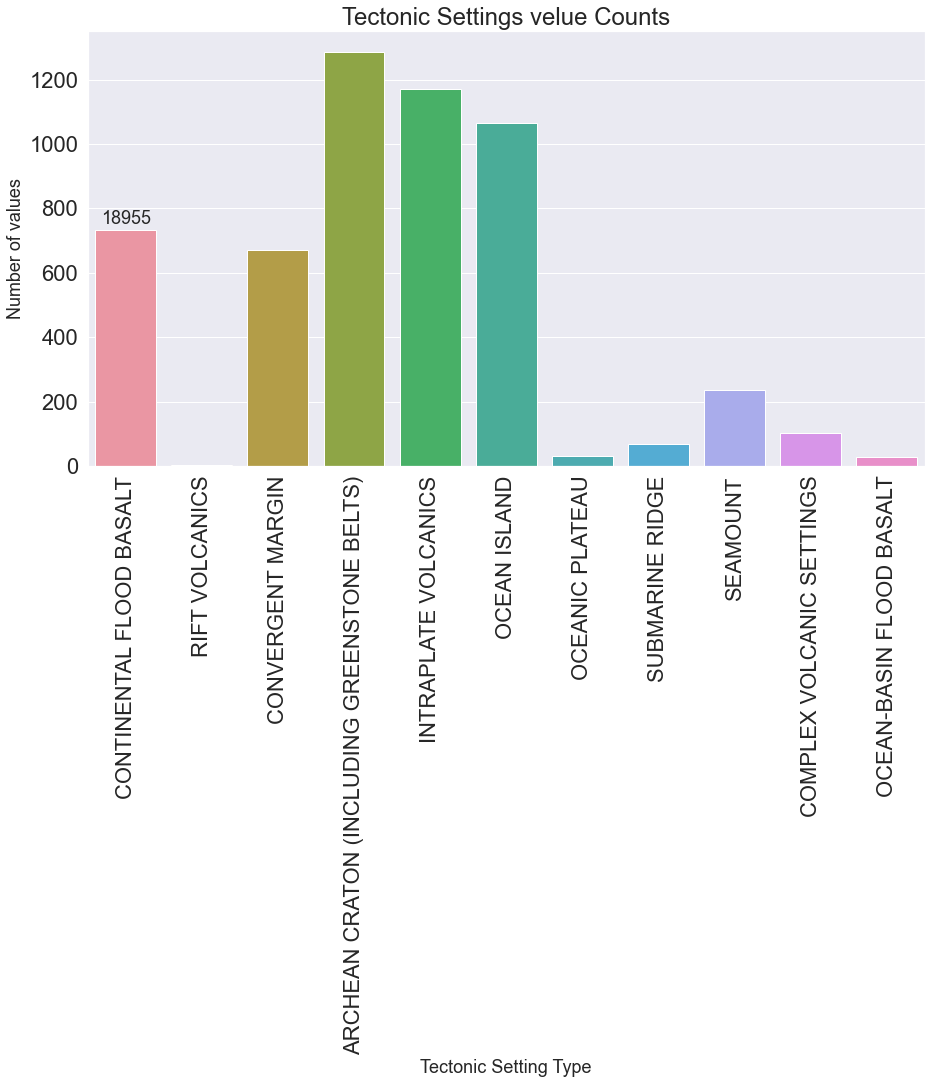

In [209]:
#see the target values in a bar chart

import seaborn as sns 
import matplotlib.pyplot as plt 
target_dummies = pd.get_dummies(df_target['TECTONIC SETTING'])
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
categories = df_target['TECTONIC SETTING'].unique()
ax= sns.barplot(categories, target_dummies.sum().values)

plt.title("Tectonic Settings velue Counts", fontsize=24)
plt.ylabel('Number of values', fontsize=18)
plt.xlabel('Tectonic Setting Type', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#adding the text labels
rects = ax.patches
labels = target.sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

<h3><a id = "61">6.1. Model Competition</a></h3>

In [47]:
#import models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import KFold, cross_val_score
from numpy import mean

In [188]:
# models 
def get_models():
    models = list()
    models.append(KNeighborsClassifier())
    models.append(ExtraTreeClassifier())
    models.append(RandomForestClassifier())
    models.append(ExtraTreesClassifier())
    return models

#model competition with k_fold = 10
def model_competition(X,y):
          
    cv = KFold(n_splits = 10, shuffle = True, random_state = 2020)
    models = get_models()
    model_means = list()
    for model in models:
        scores =  cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
        model_means.append(mean(scores))
        
    return model_means

In [220]:
#for improve my misarable lap-top I will cut data 
df_competition = pd.DataFrame(data = df.iloc[0:100,:], columns = df.columns)
target_competition = pd.DataFrame(data = target.iloc[0:100,:])

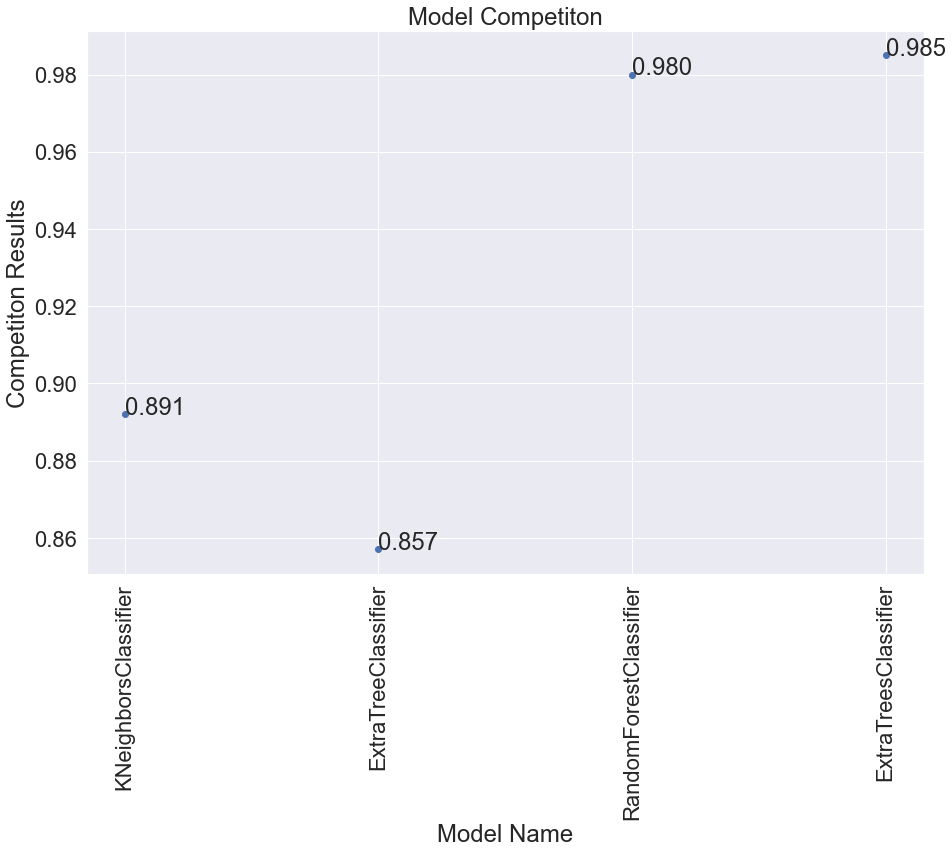

In [211]:
#lets do the competition
model_means = model_competition(df_competition, target_competition)

#show the competiton results on chart
models = get_models()
models_name = list()

for model in models:
    
    models_name.append(type(model).__name__)

plt.rcParams["figure.figsize"] = (15,10)   
plt.scatter(models_name, model_means)
plt.title('Model Competiton')
plt.xlabel('Model Name')
plt.ylabel('Competiton Results')
plt.xticks(rotation=90)
for a,b in zip(models_name, model_means): 
    plt.text(a, b, str(b)[:5])
plt.show()

<font size = 6 color = red>
    <p style = text-align:center>
        Winner is ExtraTreesClassifier with 0.985.
    </p>
</font>

<h3><a id = "62">6.2. Best KFold Selection</a></h3>

In [215]:
#fold range
folds = range(2,25)

#competition winner model
model = ExtraTreesClassifier()

#lists for means, minimum and maximum results 
bestK_means, bestK_mins, bestK_maxs = list(), list(), list()

#loop in folds
for k in folds: 
    #define test conditions 
    cv = KFold(n_splits = k, shuffle = True, random_state = 2020)
    #evaluate k value 
    scores =  cross_val_score(model, df_competition, target_competition, scoring = 'accuracy', cv = cv, n_jobs = -1)
    k_mean = mean(scores)
    k_max = scores.max()
    k_min = scores.min()
    print('> folds = %d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
            
    bestK_means.append(k_mean)
    bestK_mins.append(k_mean - k_min)
    bestK_maxs.append(k_max - k_mean)

> folds = 2, accuracy=0.952 (0.952,0.952)
> folds = 3, accuracy=0.969 (0.958,0.982)
> folds = 4, accuracy=0.983 (0.980,0.988)
> folds = 5, accuracy=0.986 (0.975,0.995)
> folds = 6, accuracy=0.981 (0.970,0.994)
> folds = 7, accuracy=0.987 (0.972,1.000)
> folds = 8, accuracy=0.985 (0.968,1.000)
> folds = 9, accuracy=0.986 (0.964,1.000)
> folds = 10, accuracy=0.985 (0.940,1.000)
> folds = 11, accuracy=0.987 (0.956,1.000)
> folds = 12, accuracy=0.988 (0.952,1.000)
> folds = 13, accuracy=0.985 (0.948,1.000)
> folds = 14, accuracy=0.985 (0.931,1.000)
> folds = 15, accuracy=0.988 (0.955,1.000)
> folds = 16, accuracy=0.986 (0.952,1.000)
> folds = 17, accuracy=0.985 (0.932,1.000)
> folds = 18, accuracy=0.985 (0.929,1.000)
> folds = 19, accuracy=0.985 (0.943,1.000)
> folds = 20, accuracy=0.986 (0.920,1.000)
> folds = 21, accuracy=0.989 (0.917,1.000)
> folds = 22, accuracy=0.984 (0.935,1.000)
> folds = 23, accuracy=0.989 (0.932,1.000)
> folds = 24, accuracy=0.986 (0.881,1.000)


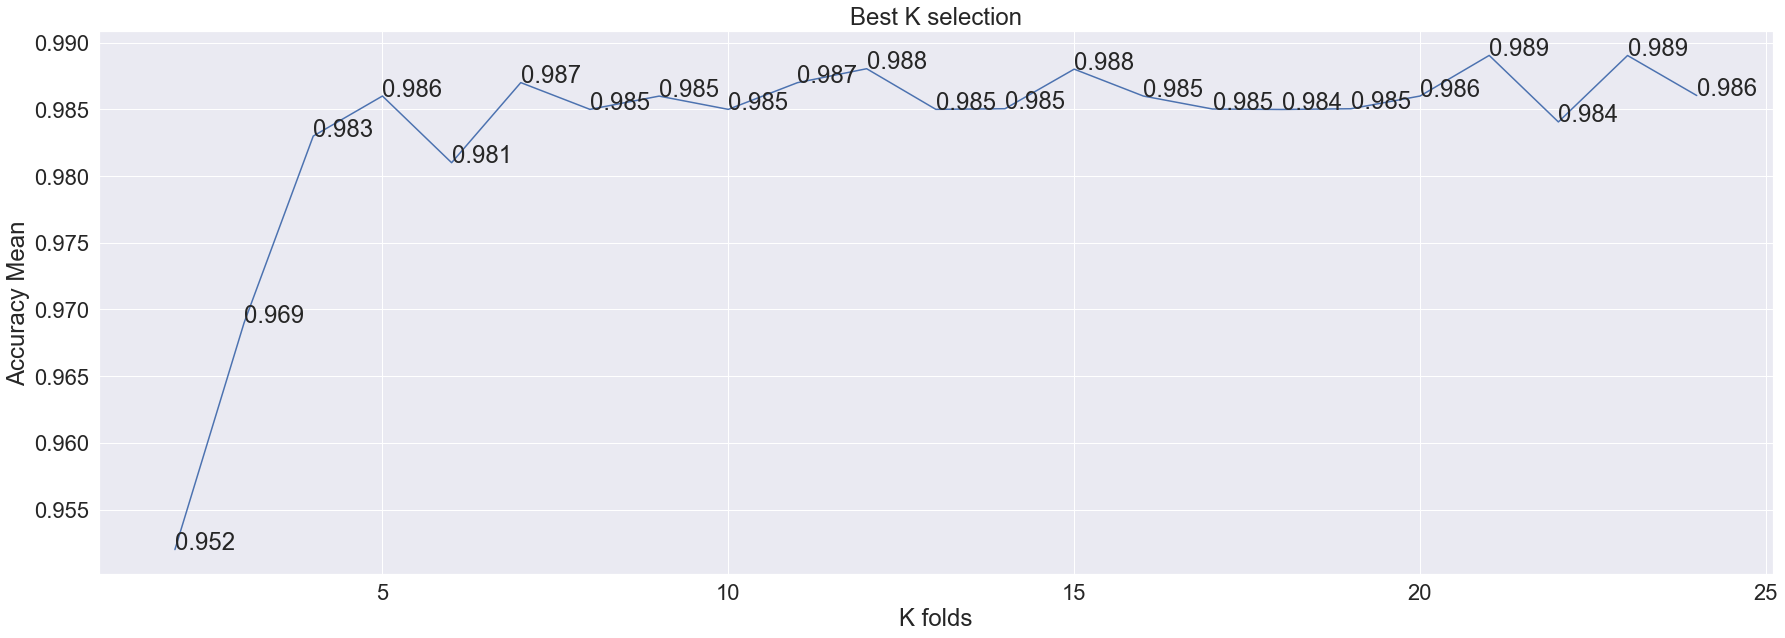

In [216]:
#show in chart k-fold results 
plt.rcParams['figure.figsize'] = (30,10)
plt.plot(folds, bestK_means)
plt.title('Best K-Fold selection')
plt.xlabel('K folds')
plt.ylabel('Accuracy Mean')
for a,b in zip(folds, bestK_means): 
    plt.text(a, b, str(b)[:5])
plt.show()

<font size = 6 color = red>
    <p style = text-align:center>
        Winner is the 21 KFold with 0.989.
    </p>
</font>

<h3><a id = "63">6.3. Hyper Parameter Selection</a></h3>

In [249]:
#import Randomized Search 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

#define model 
model = ExtraTreesClassifier(n_jobs = -1, random_state=2020)

#define pipeline
pipeline = Pipeline(steps = [('model', model)])

#define Repeated KFold with 21 splits
cv = RepeatedStratifiedKFold(n_splits=21, n_repeats=3, random_state=2020)
#define extratreesclassifiers hyperparameters 
param_grid = {"model__random_state": [2020], 
              #"n_estimators" : [10,100],
              "model__max_depth": [25, 30, 32, 34, 38, 45],
              "model__criterion": ['gini', 'entropy'],
              "model__min_samples_split": [2,5,10,12,15,17,20],
              "model__min_samples_leaf":[1,2,3,4,5],
              "model__max_features":["auto", "sqrt", "log2"]}

#define RandomizedSearchCV
search = RandomizedSearchCV(pipeline, param_grid, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=2020)

#fit RandomizedSearchCV
search.fit(df_competition, target_competition)

#print results and scores 
print("After RandomizedSearchCV")
print()
print("Best index results is:",search.best_index_)
print()
print("Best score is:",search.best_score_)
print()
print("Best hyperparameter values are:",search.best_params_)

D:\Program Data\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=21.
  % (min_groups, self.n_splits)), UserWarning)
D:\Program Data\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=21.
  % (min_groups, self.n_splits)), UserWarning)
D:\Program Data\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=21.
  % (min_groups, self.n_splits)), UserWarning)
D:\Program Data\Anaconda3_64\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


After RandomizedSearchCV

Best index results is: 37

Best score is: 0.9904761904761904

Best hyperparameter values are: {'model__random_state': 2020, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 34, 'model__criterion': 'gini'}


<h3><a id = "64">6.4. Estimator Model Applying</a></h3>

In [48]:
#import train test split and apply 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.25, random_state = 2020)

#apply searched hyper parameters in model
model = ExtraTreesClassifier(random_state = 2020, 
                            n_jobs = -1,
                            min_samples_split = 5,
                            min_samples_leaf = 1,
                            max_features = 'auto',
                            max_depth = 34,
                            criterion = 'gini')
#fit model
model.fit(X_train, y_train)
#prediction
y_pred = model.predict(X_test)
#score
score = accuracy_score(y_test, y_pred)

print("The score of the model is %0.3f" % (score))

D:\Program Data\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


The score of the model is 0.970


<hr style="border: none; border-bottom: 2px solid lightblue;">

<h1><a id = "7"> 7. TRY OTHER 7 DATA</a></h1>

<h3><a id = "71">7.1. Clean All Basalt Data</a></h3>

In [268]:
def prepare_basalts(df):
    columns = basalt1.columns
    print("Data shape at the begining = ", df.shape)
    print()
    #first drop empty columns. I already defining this function in the name drop_nan_columns 
    print("Drop empty columns")
    print()
    df = drop_nan_columns(df,len(df))
    print("Columns left after drop=", len(df.columns))
    print()
    
    #clean Tectonic Settng  empty rows 
    print("Clean Tectonic Setting NaN values rows from whole data")
    print()
    df = df[df['TECTONIC SETTING'].notna()]
    print('Data shape after delete Tectonic Setting NaN values=', df.shape)
    print()
    
    #seperate object data 
    print("Object Data Seperation")
    objects = define_objects(df)
    #drop useless columns from object_data
    dropped_columns_from_object = ["CITATIONS", 
                              "LOCATION",
                             "LOCATION COMMENT",
                             "SAMPLE NAME",
                             "MIN. AGE (YRS.)",
                             "MAX. AGE (YRS.)",
                             "MINERAL",
                             "UNIQUE_ID"]
    objects = objects.drop(columns = dropped_columns_from_object, axis = 1)

    #change object_data columns to category
    objects[['TECTONIC SETTING', 'LAND OR SEA', 'ROCK NAME', 'GEOL.', 'AGE',
       'ROCK TEXTURE', 'ROCK TYPE', 'ALTERATION', 'MATERIAL']] = objects[['TECTONIC SETTING', 'LAND OR SEA', 'ROCK NAME', 'GEOL.', 'AGE',
       'ROCK TEXTURE', 'ROCK TYPE', 'ALTERATION', 'MATERIAL']].astype('category')


    #clean object data rows  
    objects['ROCK NAME'] = objects['ROCK NAME'].str.replace(r"(\s*\[.*?\]\s*)", "")
    objects['AGE'] = objects['AGE'].str.replace(r"(\s*\[.*?\]\s*)", "")
    objects['MATERIAL'] = objects['MATERIAL'].str.replace(r"(\s*\[.*?\]\s*)", "")
    objects['GEOL.'] = objects['GEOL.'].str.replace(r"(\s*\[.*?\]\s*)", "")
    objects['ROCK TEXTURE'] = objects['ROCK TEXTURE'].str.replace(r"(\s*\[.*?\]\s*)", "")
    print("Objects Data is ready")
    print()
    
    print("ppm, wt, lat_lon data preperation")
    print()
    #seperate ppm data
    ppm = find_column_names(df, ('PPM'))
    
    #fill ppm data NaN values with 0 
    ppm = ppm.fillna(0)
    
    #seperate wt data
    wt = find_column_names(df, ('WT%'))
    #fill wt data NaN values with 0 
    wt = wt.fillna(0)
    
    #seperate a langitude and latitude data
    lat_lon = df.iloc[:,4:8]
    
    print("ppm, wt, lat_lon data are ready")
    print()
    
    #columns counts 
    print("Columns Counts")
    print("object columns count", len(objects.columns))
    print("ppm columns count", len(ppm.columns))
    print("wt columns count", len(wt.columns))
    print("lat_lon columns count", len(lat_lon.columns))
    print()
          
    #join date together 
    print("data re-union")
    print()
    data = objects
    data = data.join(lat_lon)
    data = data.join(wt)
    data = data.join(ppm)
    print("data shape after re-union", data.shape)
    print()
    
    #this time o dont need to fill data. So, I will drop whole NaN rows from object data
    print("Drop all NaN rows")
    print()
   
    data = data[data['ROCK TEXTURE'].notna()] 
    data = data[data['GEOL.'].notna()] 
    data = data[data['AGE'].notna()]
    data = data[data['ALTERATION'].notna()]
    print("final data shape", data.shape)
    
    return data

In [269]:
#clean basalt1
basalt1_clean = prepare_basalts(basalt1)

Data shape at the begining =  (11739, 172)

Drop empty columns

23 columns dropped
Columns left after drop= 149

Clean Tectonic Setting NaN values rows from whole data

Data shape after delete Tectonic Setting NaN values= (10636, 149)

Object Data Seperation
17 columns dtypes are object
Objects Data is ready

ppm, wt, lat_lon data preperation

ppm, wt, lat_lon data are ready

Columns Counts
object columns count 9
ppm columns count 74
wt columns count 23
lat_lon columns count 4

data re-union

data shape after re-union (10636, 110)

Drop all NaN rows

final data shape (1, 110)


In [270]:
#clean basat2 
basalt2_clean = prepare_basalts(basalt2)

Data shape at the begining =  (9769, 172)

Drop empty columns

23 columns dropped
Columns left after drop= 149

Clean Tectonic Setting NaN values rows from whole data

Data shape after delete Tectonic Setting NaN values= (8547, 149)

Object Data Seperation
17 columns dtypes are object
Objects Data is ready

ppm, wt, lat_lon data preperation

ppm, wt, lat_lon data are ready

Columns Counts
object columns count 9
ppm columns count 73
wt columns count 25
lat_lon columns count 4

data re-union

data shape after re-union (8547, 111)

Drop all NaN rows

final data shape (7, 111)


In [271]:
#clean basalt4
basalt4_clean = prepare_basalts(basalt4)

Data shape at the begining =  (17336, 172)

Drop empty columns

22 columns dropped
Columns left after drop= 150

Clean Tectonic Setting NaN values rows from whole data

Data shape after delete Tectonic Setting NaN values= (15436, 150)

Object Data Seperation
17 columns dtypes are object
Objects Data is ready

ppm, wt, lat_lon data preperation

ppm, wt, lat_lon data are ready

Columns Counts
object columns count 9
ppm columns count 72
wt columns count 26
lat_lon columns count 4

data re-union

data shape after re-union (15436, 111)

Drop all NaN rows

final data shape (31, 111)


In [272]:
#clean basalt 5
basalt5_clean = prepare_basalts(basalt5)

Data shape at the begining =  (14556, 172)

Drop empty columns

22 columns dropped
Columns left after drop= 150

Clean Tectonic Setting NaN values rows from whole data

Data shape after delete Tectonic Setting NaN values= (13084, 150)

Object Data Seperation
17 columns dtypes are object
Objects Data is ready

ppm, wt, lat_lon data preperation

ppm, wt, lat_lon data are ready

Columns Counts
object columns count 9
ppm columns count 73
wt columns count 28
lat_lon columns count 4

data re-union

data shape after re-union (13084, 114)

Drop all NaN rows

final data shape (68, 114)


In [273]:
#clean basalt6 
basalt6_clean = prepare_basalts(basalt6)

Data shape at the begining =  (14628, 172)

Drop empty columns

24 columns dropped
Columns left after drop= 148

Clean Tectonic Setting NaN values rows from whole data

Data shape after delete Tectonic Setting NaN values= (13254, 148)

Object Data Seperation
17 columns dtypes are object
Objects Data is ready

ppm, wt, lat_lon data preperation

ppm, wt, lat_lon data are ready

Columns Counts
object columns count 9
ppm columns count 71
wt columns count 27
lat_lon columns count 4

data re-union

data shape after re-union (13254, 111)

Drop all NaN rows

final data shape (39, 111)


In [274]:
#clean basalt7
basalt7_clean = prepare_basalts(basalt7)

Data shape at the begining =  (12767, 172)

Drop empty columns

21 columns dropped
Columns left after drop= 151

Clean Tectonic Setting NaN values rows from whole data

Data shape after delete Tectonic Setting NaN values= (11389, 151)

Object Data Seperation
17 columns dtypes are object
Objects Data is ready

ppm, wt, lat_lon data preperation

ppm, wt, lat_lon data are ready

Columns Counts
object columns count 9
ppm columns count 73
wt columns count 26
lat_lon columns count 4

data re-union

data shape after re-union (11389, 112)

Drop all NaN rows

final data shape (19, 112)


In [275]:
#clean basalt8 
basalt8_clean = prepare_basalts(basalt8)

Data shape at the begining =  (12044, 172)

Drop empty columns

24 columns dropped
Columns left after drop= 148

Clean Tectonic Setting NaN values rows from whole data

Data shape after delete Tectonic Setting NaN values= (10712, 148)

Object Data Seperation
17 columns dtypes are object
Objects Data is ready

ppm, wt, lat_lon data preperation

ppm, wt, lat_lon data are ready

Columns Counts
object columns count 9
ppm columns count 71
wt columns count 25
lat_lon columns count 4

data re-union

data shape after re-union (10712, 109)

Drop all NaN rows

final data shape (15, 109)


<font size = 5 color = #1e5492>
    There is not a standard between data about columns. ppm and wt columns counts are different of them. I will
    concat these data becouse we do not have much rows for ML. I want to see result of the PCA on concat data.
</font>

In [282]:
#concat data 
concat = pd.concat([basalt1_clean,
                   basalt2_clean,
                   basalt4_clean,
                   basalt5_clean,
                   basalt6_clean,
                   basalt7_clean,
                   basalt8_clean])

print("concat data shape", concat.shape)

concat data shape (180, 118)


In [289]:
#check columns 
concat.columns.values

array(['TECTONIC SETTING', 'LAND OR SEA', 'ROCK NAME', 'GEOL.', 'AGE',
       'ROCK TEXTURE', 'ROCK TYPE', 'ALTERATION', 'MATERIAL',
       'LATITUDE MIN', 'LATITUDE MAX', 'LONGITUDE MIN', 'LONGITUDE MAX',
       'SIO2(WT%)', 'TIO2(WT%)', 'AL2O3(WT%)', 'CR2O3(WT%)', 'FE2O3(WT%)',
       'FEO(WT%)', 'FEOT(WT%)', 'CAO(WT%)', 'MGO(WT%)', 'MNO(WT%)',
       'NIO(WT%)', 'K2O(WT%)', 'NA2O(WT%)', 'P2O5(WT%)', 'H2O(WT%)',
       'H2OP(WT%)', 'H2OM(WT%)', 'CO2(WT%)', 'F(WT%)', 'CL(WT%)',
       'SO3(WT%)', 'S(WT%)', 'LOI(WT%)', 'LI(PPM)', 'BE(PPM)', 'B(PPM)',
       'CO2(PPM)', 'F(PPM)', 'NA(PPM)', 'MG(PPM)', 'AL(PPM)', 'P(PPM)',
       'S(PPM)', 'CL(PPM)', 'K(PPM)', 'CA(PPM)', 'SC(PPM)', 'TI(PPM)',
       'V(PPM)', 'CR(PPM)', 'MN(PPM)', 'FE(PPM)', 'CO(PPM)', 'NI(PPM)',
       'CU(PPM)', 'ZN(PPM)', 'GA(PPM)', 'GE(PPM)', 'AS(PPM)', 'SE(PPM)',
       'BR(PPM)', 'RB(PPM)', 'SR(PPM)', 'Y(PPM)', 'ZR(PPM)', 'NB(PPM)',
       'MO(PPM)', 'RU(PPM)', 'RH(PPM)', 'PD(PPM)', 'AG(PPM)', 'CD(PPM)',
       'IN

In [293]:
#check NaN values 
concat.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<font size = 5 color = #1e5492>
    Every NaN values belog to ppm and wt values. I will fill tham with 0
</font>

In [294]:
concat = concat.fillna(0)
#check NaN values 
concat.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<h3><a id = "72">7.2. Apply PCA Concat Data</a></h3>

In [295]:
#deploy pca 
pca = PCA(0.95)

#PCA for objects
le_objects_concat = LabelEncoder() #label encoder application
objects_concat = concat.iloc[:,1:9]
objects_concat = objects_concat.apply(le_objects_concat.fit_transform)
objects_concat_shape_before_PCA = objects_concat.shape
objects_concat = pca.fit_transform(objects_concat)
objects_concat_shape_after_PCA = objects_concat.shape
print("objects_concat shape after PCA=",objects_concat_shape_after_PCA)
print('%1.0f columns has been decreased from objects_concat' 
      %(objects_concat_shape_before_PCA[1]-objects_concat_shape_after_PCA[1]))
print()

#PCA for lat_lon
lat_lon_concat = concat.iloc[:,9:13]
lat_lon_concat = StandardScaler().fit_transform(lat_lon_concat.values)
lat_lon_concat_shape_before_PCA = lat_lon_concat.shape
lat_lon_concat = pca.fit_transform(lat_lon_concat)
lat_lon_concat_shape_after_PCA = lat_lon_concat.shape
print("lat_lon_concat shape after PCA=",lat_lon_concat_shape_after_PCA)
print("%1.0f columns has been decreased from lat_lon" 
      % (lat_lon_concat_shape_before_PCA[1]-lat_lon_concat_shape_after_PCA[1]))
print()

#PCA for ppm
ppm_concat = find_column_names(concat, ('PPM'))
ppm_concat = StandardScaler().fit_transform(ppm_concat.values)
ppm_concat_shape_before_PCA = ppm_concat.shape
ppm_concat = pca.fit_transform(ppm_concat)
ppm_concat_shape_after_PCA = ppm_concat.shape
print("ppm shape after PCA=",ppm_concat_shape_after_PCA)
print("%1.0f columns has been decreased from ppm" 
      % (ppm_concat_shape_before_PCA[1]-ppm_concat_shape_after_PCA[1]))
print()

#PCA for wt
wt_concat = find_column_names(concat, ('WT%'))
wt_concat = StandardScaler().fit_transform(wt_concat.values)
wt_concat_shape_before_PCA = wt_concat.shape
wt_concat = pca.fit_transform(wt_concat)
wt_concat_shape_after_PCA = wt_concat.shape
print("wt shape after PCA=",wt_concat_shape_after_PCA)
print("%1.0f columns has been decreased from wt" 
      % (wt_concat_shape_before_PCA[1]-wt_concat_shape_after_PCA[1]))

objects_concat shape after PCA= (180, 3)
5 columns has been decreased from objects_concat

lat_lon_concat shape after PCA= (180, 2)
2 columns has been decreased from lat_lon

ppm shape after PCA= (180, 20)
55 columns has been decreased from ppm

wt shape after PCA= (180, 11)
19 columns has been decreased from wt


In [299]:
#transform PCA date to the data frame 
df_objects_concat = pd.DataFrame(data =objects_concat, columns = ['attribute_1', "attribute_2","attribute_3"])
df_lat_lon_concat = pd.DataFrame(data =lat_lon_concat, columns = ["lat_lot_1", "lat_lot_2"])
df_wt_concat = pd.DataFrame(data = wt_concat, columns = ["wt_1","wt_2","wt_3","wt_4","wt_5",
                                                        "wt_6","wt_7","wt_8","wt_9","wt_10","wt_11"])
df_ppm_concat = pd.DataFrame(data = ppm_concat)

In [304]:
df_wt_concat.shape

(180, 11)

In [310]:
#back together concat data 
concat_pca = df_objects_concat
concat_pca = concat_pca.join(df_lat_lon_concat)
concat_pca = concat_pca.join(df_wt_concat)
concat_pca = concat_pca.join(df_ppm_concat)

print("shape of concat_pca", concat_pca.shape)
concat_pca.head()

shape of concat_pca (180, 36)


,attribute_1,attribute_2,attribute_3,lat_lot_1,lat_lot_2,wt_1,wt_2,wt_3,wt_4,wt_5,...,10,11,12,13,14,15,16,17,18,19
0,10.889069,3.144857,-1.535921,-2.894331,1.023011,-0.011001,1.820216,-0.958094,0.576604,-0.994040,...,-1.178362,-0.490702,0.753711,2.106861,9.551267,3.805066,-2.449079,-0.068879,-1.470803,-1.317658
1,10.049197,-1.836421,-2.858939,0.174627,-1.313653,-2.242800,-0.312212,2.492871,-3.197882,2.211745,...,-0.557531,-0.103649,0.366740,-0.764441,-0.021170,-0.388677,0.569220,0.434130,-1.137287,-0.663379
2,9.954749,-1.808277,-2.791481,0.173870,-1.314701,-1.857057,-0.264352,2.233701,-2.370369,1.336972,...,-0.450824,0.143060,0.243967,-0.930770,0.211850,-0.369041,0.266066,1.035343,-0.756610,-0.330391
3,-6.929675,-1.495707,-3.645472,0.206976,-1.321386,-2.624450,-0.609417,2.379342,-1.821937,0.382631,...,0.295306,-1.945505,0.987470,-2.856690,0.791031,0.042006,0.042037,2.050957,-0.691920,0.073347
4,-5.934622,-1.514646,-3.596560,0.206516,-1.322439,-2.122377,-0.050540,1.528865,-1.271090,0.173266,...,-1.075189,1.944658,0.915072,-1.459664,1.814693,-1.248914,0.325343,2.031549,-1.058092,2.473547


<h3><a id = "73">7.3. Prepare Target Column</a></h3>

In [326]:
le_concat_target = LabelEncoder()
target_concat = le_concat_target.fit_transform(concat['TECTONIC SETTING'])


<h3><a id = "74">7.4. Feed ML Method </a></h3>

In [327]:

print("df shape", df.shape)
print("target shape", target.shape)

print("concat_pca shape", concat_pca.shape)
print("target_concat shape", target_concat.shape)

df shape (5395, 70)
target shape (5395, 1)
concat_pca shape (180, 36)
target_concat shape (180,)


In [324]:
#prediction
y_pred = model.predict(concat_pca)
#score
score = accuracy_score(target, y_pred)

print("The score of the model is %0.3f" % (score))

ValueError: Number of features of the model must match the input. Model n_features is 70 and input n_features is 36 

<hr style="border: none; border-bottom: 2px solid lightblue;">

<h1><a id = "8"> 8. CONCLUSION</a></h1>

<font size = 5 color = #1e5492>
    Don't panic!!! I know there is an error code in there. I let it to be there because, I wanted to think on it.
    In training data there were 70 columns for training but after cleaning concat data had only 36 columns. Model
    did not worked as you could see above. The golden question:
</font>
<br>
<br>
<font size = 5 color = red>
    <p style = text-align:center>
        What would you do,if you were me, at this point?
    </p>
</font>
<br>
<font size = 5 color = #1e5492>
    The first thing I thought, PCA usage could be mistake. I checked the all basalt data again and I realized,
    there is no standard between columns especially between ppm and wt% columns. 
</font>
<font size = 5 color = #1e5492>
    Maybe if I concat whole data at the beginning, I have could use all of them. I wanted to train ML with 1 data
    and test the ML performance with others. Simulation of real world... I failed :) 
</font>
<br>
<br>
<font size = 5 color = #1e5492>
    I learned much and I felt more and more ignorant while create this project, I hope you spent nice time with me.
</font>
<br>
<br>
<font size = 5 color = black>
    <p style = text-align:right>
        <em>
            thank you for your patience
            <br>
            <br>
            Best Regards            
        </em>
    </p> 
</font>
<hr>
<br>
<font size = 5 color = #1e5492>
    <p style = text-align:center>
        Aydin Aktar 
        <br>
        <br>
        Mineral Processing Engineer 
        <br>
        <br>
        aktaraydin@gmail.com
        <br>
        <br>
        See you on next project...
        <br>
        <br>
        <a href = "https://www.linkedin.com/in/aktaraydin/"> Linkedin Profile</a>
    </p>
</font>    

<hr style="border: none; border-bottom: 2px solid lightblue;">